<a href="https://colab.research.google.com/github/AjeetSingh21/Project-SQAC/blob/main/Smart_expense_categorizer_SQAC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, f1_score, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import seaborn as sns


In [48]:
def predict(X_train,X_test,y_train,y_test):
  vect = TfidfVectorizer(max_features=1000, stop_words='english')
  X_train_idf = vect.fit_transform(X_train)
  X_test_idf = vect.transform(X_test)
  model = LogisticRegression(max_iter=1000)
  model.fit(X_train_idf,y_train)
  ypred = model.predict(X_test_idf)
  acc = accuracy_score(y_test,ypred)
  print("Accuracy: ",acc)
  print("Classification Report: ",classification_report(y_test, ypred))
  return model, vect, ypred, acc

In [50]:
ds = pd.read_csv("Transactions.csv")
ds = ds.drop_duplicates()

In [51]:
X = ds['text']
y = ds['label']

In [52]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [53]:
model, vect, ypred, acc = predict(X_train,X_test,y_train,y_test)

Accuracy:  1.0
Classification Report:                 precision    recall  f1-score   support

        Bills       1.00      1.00      1.00        61
Entertainment       1.00      1.00      1.00        51
         Food       1.00      1.00      1.00        54
    Groceries       1.00      1.00      1.00        51
       Health       1.00      1.00      1.00        47
       Others       1.00      1.00      1.00        55
     Recharge       1.00      1.00      1.00        49
       Salary       1.00      1.00      1.00        53
     Shopping       1.00      1.00      1.00        58
       Travel       1.00      1.00      1.00        60

     accuracy                           1.00       539
    macro avg       1.00      1.00      1.00       539
 weighted avg       1.00      1.00      1.00       539



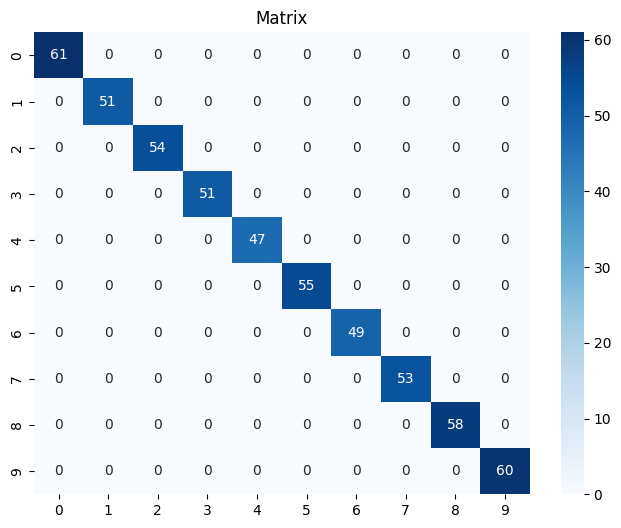

In [54]:
cm = confusion_matrix(y_test,ypred)
plt.figure(figsize=(8,6))
sns.heatmap(cm,annot=True, fmt='d',cmap='Blues')
plt.title("Matrix")
plt.show()

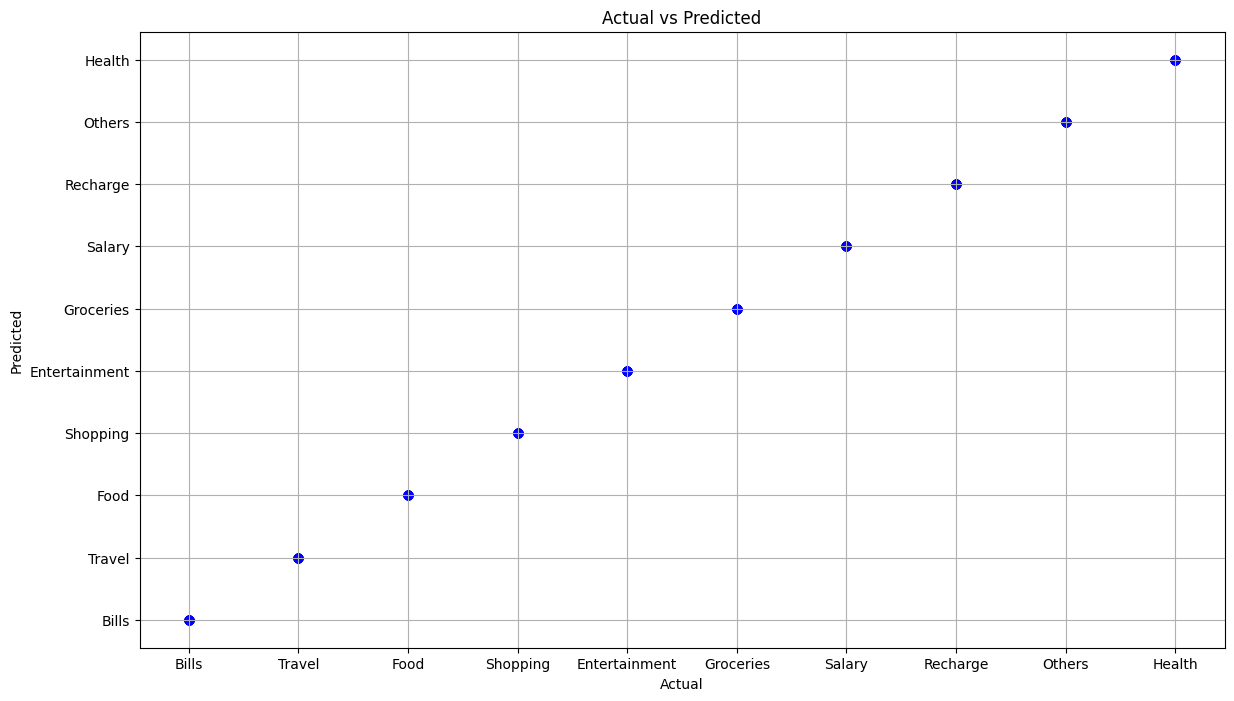

In [60]:
plt.figure(figsize=(14,8))
plt.scatter(y_test,ypred,color='blue')
plt.title("Actual vs Predicted")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.grid(True)
plt.show()